<a href="https://colab.research.google.com/github/abed-prog/TERAMOUNT/blob/main/Teramount_nano_print_Engineer_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.1/729.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.6/438.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.7 MB/s eta 0:00:00
Enter cube dimensions (width depth height): 50,50,50
✅ STL saved as: 3D_house_and_box.stl
✅ Topography saved as: Topography.png
✅ CSV saved as: element_metadata_real_eq.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

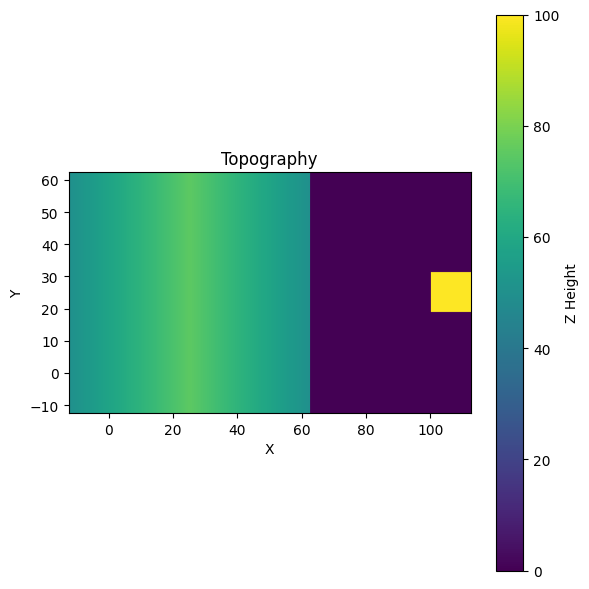

In [ ]:
# Install dependencies (Colab)
!pip install -q cadquery trimesh rtree matplotlib pandas

# Imports
import cadquery as cq
from cadquery import exporters
import trimesh, numpy as np, pandas as pd, matplotlib.pyplot as plt
from google.colab import files

# User input and derived dims
w, d, h = map(float, input("Enter cube dimensions (width depth height): ").replace(',', ' ').split())
roof_h, roof_d, roof_oh, roof_w = 0.5*h, 1.5*d, 0.25*w, w + 2*0.25*w
box_w, box_d, box_h = 0.25*w, 0.25*d, 2*h
box_xmin = 2*w
box_xmax = box_xmin + box_w
box_ymin, box_ymax = w/2 - box_d/2, w/2 + box_d/2

# Create parts
cube = cq.Workplane("XY").box(w, d, h).translate((w/2, d/2, h/2))
roof = (cq.Workplane("XZ").polyline([(-roof_w/2, 0), (roof_w/2, 0), (0, roof_h)]).close()
        .extrude(roof_d).translate((w/2, d + d/4, h)))
box = cq.Workplane("XY").box(box_w, box_d, box_h).translate((2*w + box_w/2, 2*box_d, box_h/2))
scene = cq.Compound.makeCompound([cube.val(), roof.val(), box.val()])
stl_file = "3D_house_and_box.stl"
exporters.export(scene, stl_file)
print(f"✅ STL saved as: {stl_file}")

# Topography image
mesh = trimesh.load_mesh(stl_file)
grid_size = 400
xmin, ymin, _ = mesh.bounds[0]
xmax, ymax, zmax = mesh.bounds[1]
xi, yi = np.linspace(xmin, xmax, grid_size), np.linspace(ymin, ymax, grid_size)
X, Y = np.meshgrid(xi, yi)
Z = np.zeros_like(X)
origins = np.column_stack((X.ravel(), Y.ravel(), np.full(X.size, zmax + 10)))
directions = np.tile([0,0,-1], (X.size,1))
locs, idx_rays, _ = mesh.ray.intersects_location(origins, directions)
for loc, idx in zip(locs, idx_rays):
    iy, ix = divmod(idx, grid_size)
    Z[iy, ix] = max(Z[iy, ix], loc[2])
plt.figure(figsize=(6,6))
plt.imshow(Z, origin="lower", extent=(xmin,xmax,ymin,ymax), cmap="viridis")
plt.colorbar(label="Z Height")
plt.title("Topography")
plt.xlabel("X"); plt.ylabel("Y"); plt.tight_layout()
plt.savefig("Topography.png", dpi=300)
print("✅ Topography saved as: Topography.png")

# Metadata elements
house = dict(
    Element="Element 1", position_x=w/2, position_y=d/2, position_z=h/2 + roof_h/2,
    xmin=-roof_oh, xmax=w+roof_oh, ymin=-0.25*d, ymax=d+0.25*d, zmin=0, zmax=h+roof_h,
    width=roof_w, depth=roof_d, height=h+roof_h,
    corners=[(0,0,0),(0,0,h),(0,d,0),(0,d,h),(w,0,0),(w,0,h),(w,d,0),(w,d,h),
             (-roof_oh,-roof_oh,h),(-roof_oh,-roof_oh,h+roof_h),
             (-roof_oh,d+roof_oh,h),(-roof_oh,d+roof_oh,h+roof_h),
             (w+roof_oh,-roof_oh,h),(w+roof_oh,-roof_oh,h+roof_h),
             (w+roof_oh,d+roof_oh,h),(w+roof_oh,d+roof_oh,h+roof_h)],
    **{"z range": "", "X-Distance(z)": ""}
)
box_meta = dict(
    Element="Element 2", position_x=box_xmin+box_w/2, position_y=2*box_d, position_z=box_h/2,
    xmin=box_xmin, xmax=box_xmax, ymin=box_ymin, ymax=box_ymax, zmin=0, zmax=box_h,
    width=box_w, depth=box_d, height=box_h,
    corners=[(box_xmin,box_ymin,0),(box_xmin,box_ymin,box_h),(box_xmin,box_ymax,0),(box_xmin,box_ymax,box_h),
             (box_xmax,box_ymin,0),(box_xmax,box_ymin,box_h),(box_xmax,box_ymax,0),(box_xmax,box_ymax,box_h)],
    **{"z range": "", "X-Distance(z)": ""}
)
distance_data = [
    {"Element":"—", "z range": f"0 < z < {w}", "X-Distance(z)": f"{w}"},
    {"Element":"—", "z range": f"{h} < z < {h + roof_h}", "X-Distance(z)": f"1.5*(z - {w}) + {box_xmin - (w + roof_oh)}"},
]
# Fill empty keys in distance_data to match df columns
keys = house.keys()
for d in distance_data:
    for k in keys:
        d.setdefault(k, "")

df = pd.DataFrame([house, box_meta] + distance_data)
csv_file = "element_metadata_real_eq.csv"
df.to_csv(csv_file, index=False)
print(f"✅ CSV saved as: {csv_file}")

# Download files
for f in (stl_file, "Topography.png", csv_file):
    files.download(f)
